In [75]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
from math import *
import numpy as np
import matplotlib.pyplot as plt


In [76]:
# Temperaturas
K=273.15                  # conversão para Kelvin
Tamb = 23 + K             # temperatura ambiente
Tmac0 = 4.9 + K             # temperatura inicial do macarrão (K)
Trec0=Tmac0               # temperatura recipiente

In [77]:
# Coeficiente de transferência convectiva (W/(m2.K))
hs = 95              # vidro para o ar

# condutividade do vidro
kv = 0.8                 # W/(m.K)

# condutividade térmica do plástico
# kp = 0.22                # W/(m.K) Fonte: https://www.intechopen.com/chapters/65584

In [78]:
# Dimensões da marmita (m)
Al = 0.042                 # área lateral
Ab = 0.06                  # área base
At = Al + Ab               # área total
dr = 0.005                  # espessura (m)

In [79]:

# Propriedades do vidro
mr = 0.4                   # massa vidro (kg)
cr = 753                   # calor específico do vidro 

# Macarrão
mmac = 0.2                    # massa do macarrão (kg)
cmac = 1800                   # calor específico do macarrão (J/(kg· C))

In [80]:
# tempo
tf = 200 # minutos
dt = 1 # minutos
lista_t = np.arange(0, tf, dt)

In [81]:
R1 = 1 / (hs * At)
R2 = (dr / 2) / (kv * At)
Req1 = R1 + R2
Req2 = R2

In [82]:
def dTdt(y, t):
    Tr = y[0]
    Tmac = y[1]
    Q1 = (Tamb - Tr) / Req1
    Q2 = (Tmac - Tr) / Req2
    
    dUrdt = Q1 - Q2
    dUMacdt = Q2

    dTMacdt = dUMacdt / (mmac*cmac)
    dTrdt = dUrdt / (mr*cr) # massa recip e coeficiente recip
    
    return [dTMacdt, dTrdt]

In [85]:
experimento=[4.9,5.8,6.5,7.3,7.8,8.3,9.0,9.6,10.4,11.3,12.1,12.8,
            13.4,14.0,14.6,15.2,15.6,16,16.5,16.9,17.2,17.6,17.9,
            18.2,18.4,18.7,18.9,19.1,19.3,19.6,19.9,20,20.2,20.4]

exp_tempo=np.arange(0,len(experimento)*5,5)

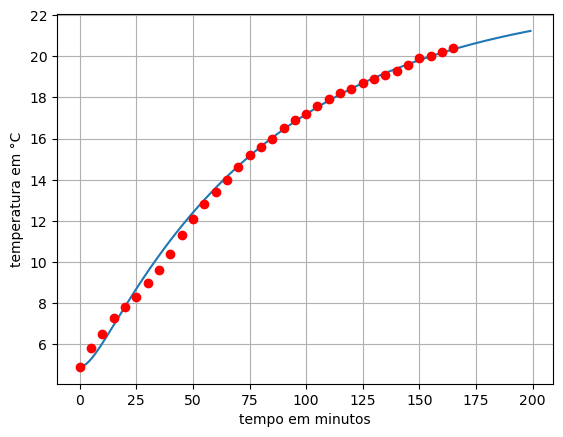

In [86]:
y0 = [Tmac0,Trec0]
solucao = odeint(dTdt, y0, lista_t)
temp_C = solucao - K
dTMacdt = temp_C[:,0]
dTrdt = temp_C[:,1]

plt.plot(lista_t, dTMacdt)
plt.plot(exp_tempo,experimento,'ro')
plt.xlabel("tempo em minutos")
plt.ylabel("temperatura em °C")
plt.grid()
plt.show()


